<h1>Developer Dataset Analysis</h1>

Project overview:

Understanding the type of developers bsed on the data from Stack Overflow dataset which consists of survery responses from developers across the globe.

<h2> Starting with exploratory analysis </h2>



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob 
import numpy as np
from collections import Counter
import seaborn as sns

In [11]:
# Reading the data into the notebook
data = pd.read_csv("/Users/jai/Library/Mobile Documents/com~apple~CloudDocs/Machine Learning Career Path/Offplatform projects/Stack overflow developer dataset/developer_dataset.csv")

/var/folders/c8/d8w55bgd5sd503rlpx_ymlp00000gn/T/ipykernel_88731/3542834828.py:2: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/jai/Library/Mobile Documents/com~apple~CloudDocs/Machine Learning Career Path/Offplatform projects/Stack overflow developer dataset/developer_dataset.csv")


In [12]:
# Converting the data into a dataframe 
developerDataset = pd.DataFrame(data)

# Taking a look into the columns, and data types
developerDataset.dtypes

# Taking a look at a sample of the data
display(developerDataset)

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111204,42853,2018,Japan,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111205,42854,2018,Japan,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,NaN,98000.0,NaN,NaN,NaN,NaN
111206,42855,2018,Japan,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN
111207,42856,2018,Japan,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35000.0,NaN,NaN,NaN,NaN


Taking an initial look at the data, there are many entries with missing data. Data cleaning and wrangling will be conducted appropriately before continuing with specific exploratory analysis, careful  not remove more data than needed.

Based on the columns we have variables RespondentID, Country, Employment	UndergradMajor,	DevType	to identify the individual including details about their academic background and current dev type.

LanguageWorkedWith, DatabaseWorkedWith and YearsCodePro give informationn about the respondants experience.

LanguageDesireNextYear, DatabaseDesireNextYear, PlatformDesireNextYear give insights into the aspirations of the developers in the coming year.

JobSeek, JobSeek, NEWJobHunt, WelcomeChange, NEWJobHunt, NEWJobHuntResearch and  NEWLearn give insight into the sentiment of the developers wanting to move on.   

Other variables give us inisght into the bigger picture of the developers and considers variables such as their work life balance, the size of organisation they work for and what they look for in a job. 





In [13]:
# Looking at the count of the number responses per columns.
developerDataset.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

The variation in the number of responses for each of the columns can be attributed to different factors. For example, the NEWJob hunt count is significantly less than the total number of the RespondaentID, likely due to them leaving it blank if they are not looking for a new job.

The first question I want to answer is the platforms developers are looking to upskill in the coming year. This will provide me with an insight into industry sentiment about certain technologies. However, before I start my development I need to clean the data.

The column of interest I need to clean are PlatformDesireNextYear. I only want to remove the data that is NaN for this and now the whole row.


In [14]:
developerDataset = developerDataset.dropna(subset=["PlatformDesireNextYear"])
# display(developerDataset)

# Within this column now I want to filter on the responses 
developerDataset["PlatformDesireNextYear"].nunique()
# 16024 unique responses for the number of platform desired. Taking an indepth look into the responses.

# Split the responses in the PlatformDesireNextYear to get each entry 

all_platforms = [platform.strip() for sublist in developerDataset['PlatformDesireNextYear'].str.split(';') for platform in sublist]

# Count each occurence of the platforms 
platform_counts = Counter(all_platforms)
# Convert into a dataframe for easier readibility 
platform_df = pd.DataFrame(platform_counts.items(), columns=['Platform', 'Count']).sort_values(by='Count', ascending=True)
# display(platform_df)

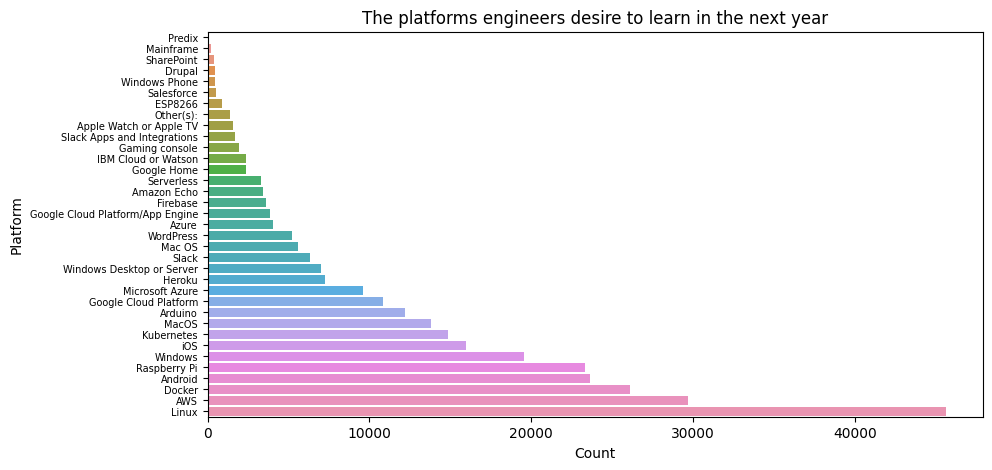

In [15]:
# To better visualise the platforms 
plt.figure(figsize=(10, 5)) 
sns.barplot(x=platform_df["Count"], y=platform_df["Platform"], data=platform_df)
plt.xticks(fontsize=10)
plt.yticks(fontsize=7)
plt.title("The platforms engineers desire to learn in the next year")
plt.show()


Based on the above plot. We can see the 3 most common platforms engineers wish to learn include Linux, Aws, and Docker. This is a good insight into the general market sentiment to these platforms. I suspect these platforms are deemed the most attractive to learn with resepct to future job prospects and fundamental acorss the board in the case for Linux. I am going to continue to look into these platforms.

To explore this further, using a subset of the data I have created a dataframe <code>linuxAWSDocker_df</code> to look into the engineers who want to learn all 3 of these platforms.

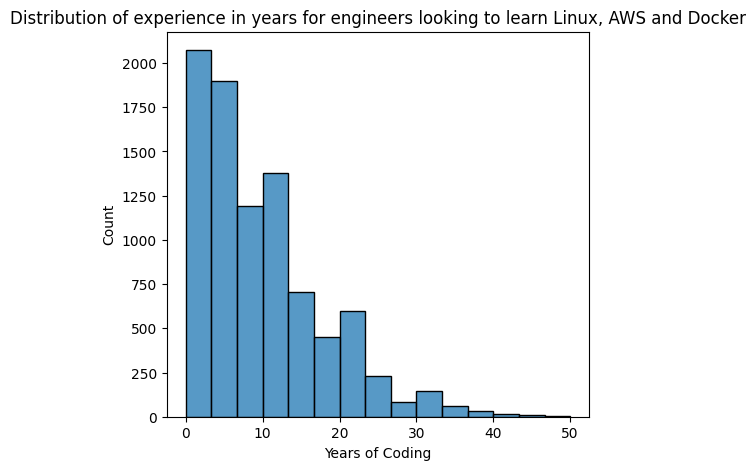

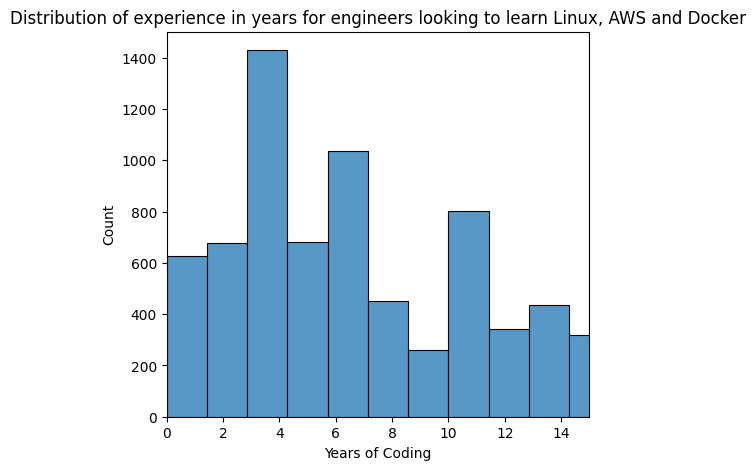

In [16]:
# From the original dataset I want to extract only rows which include responses from individuals who selected Linux, AWS and Docker as a desired platform

linuxAwsDocker_df = developerDataset[developerDataset["PlatformDesireNextYear"].str.contains("AWS", na=False)&
                    developerDataset["PlatformDesireNextYear"].str.contains("Linux",na=False)&
                    developerDataset["PlatformDesireNextYear"].str.contains("Docker", na=False)]
# display(linuxAwsDocker_df)

# To look at the amount of experience these developers who look to learn Linux, AWS and Docker I can plot a distribution of their ages
plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1) # First subplot
sns.histplot(linuxAwsDocker_df["YearsCodePro"], bins=15)
plt.title("Distribution of experience in years for engineers looking to learn Linux, AWS and Docker")
plt.xlabel("Years of Coding")
plt.show()

plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,2)
sns.histplot(linuxAwsDocker_df["YearsCodePro"], bins=35)
plt.xlim(0,15)
plt.title("Distribution of experience in years for engineers looking to learn Linux, AWS and Docker")
plt.xlabel("Years of Coding")
plt.show()

Overall, 9312 engineers want to learn Linux, AWS and Docker.

From the above histograms, the distribution is skewed to the left. This suggests engineers more junior in their career have a desire to learn the new platforms. This makes sense contextually as people begin to upskill as they become more familiar with the technologies widely used across the industry. On the flip side, those more advanced in their career are more likely to be specialised in a platform and thus do not see the need to learn Linux, Docker and AWS; or they are already familiar with the platforms.

The next bit of EDA I want to undertake is looking into how many of the people in the subset wanting to learn Linux, AWS and Docker are actively looking for a new role. 

In [31]:
jobseeking_subset = (linuxAwsDocker_df["JobSeek"] == "I am actively looking for a job").sum()
jobseeking_whole = (developerDataset["JobSeek"] == "I am actively looking for a job").sum()
# 1179 engineers in the subset of the data are actively looking for a job. 6554 engineers jobseeking from the population.

In [44]:
print((len(developerDataset["JobSeek"])))
print(jobseeking_whole)

85376
6554


The total number of people who want to learn Linux, AWS and Docker (9132) 1179 of these engineers are actively jobseeking. I am going to compare how this proportion of my subset compares to the overall number of people who are jobseeking.

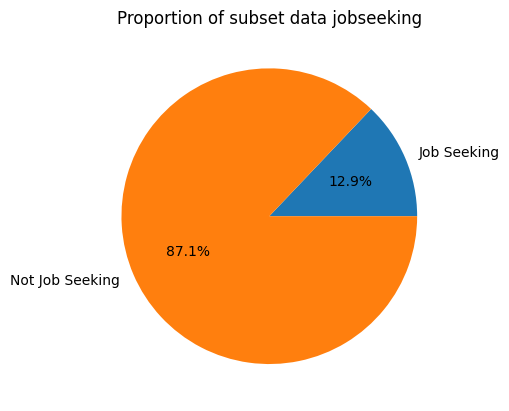

In [46]:
# Plotting the proportion of people who are jobseeking within my Linux, AWS and Docker subset
job_seeking_proportion = jobseeking_subset/len(linuxAwsDocker_df["JobSeek"])
non_job_seeking_proportion = (len(linuxAwsDocker_df["JobSeek"])-jobseeking_subset)/len(linuxAwsDocker_df["JobSeek"])
labels = ["Job Seeking", "Not Job Seeking"]
sizes = [job_seeking_proportion, non_job_seeking_proportion]
plt.pie(sizes, labels=labels, autopct="%1.1f%%" )
plt.title("Proportion of subset data jobseeking")
plt.show()

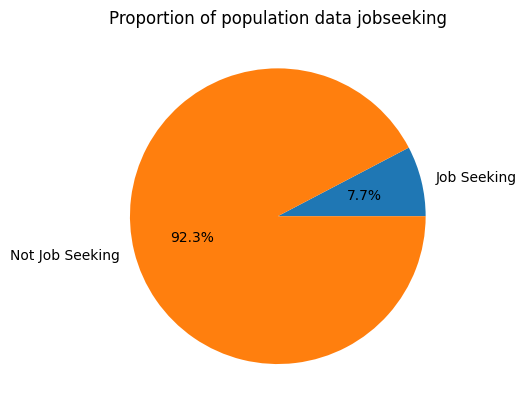

In [50]:
# Plotting the proportion of people who are jobseeking from the population
job_seeking_proportion = jobseeking_whole/len(developerDataset["JobSeek"]) 
non_job_seeking_proportion = (len(developerDataset["JobSeek"])-jobseeking_whole)/len(developerDataset["JobSeek"])
labels = ["Job Seeking", "Not Job Seeking"]
sizes = [job_seeking_proportion, non_job_seeking_proportion]
plt.pie(sizes, labels=labels, autopct="%1.1f%%" )
plt.title("Proportion of population data jobseeking")
plt.show()

From the above, we can see there is a greater proportion of people who are learning Linux, AWS and Docker jobseeking compared to the population proportion of those jobseeking. This is something that could be investigated further. A potential analysis could include investigating whether there is a correlation between platforms people want to learn and jobseeking. Are people upskilling to find new roles?

<h1>Notes</h1>
<ul>
<li> More general analysis done on each of the columns before the pie chart analysis </li>
</ul>